In [63]:
# Нужные библиотеки.
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
# Загружаем .csv таблицу.
# Заголовок: graph_type,vertex_count,edge_count,pathfinder,time_nanos
input_file = "../build/out.csv"
output_directory="../pics/"
df = pd.read_csv(input_file, sep=",")
df.head()

,graph_type,vertex_count,edge_count,pathfinder,time_nanos
0,Full,10,45,Dijkstra,1044
1,Full,10,45,Floyd-Warshall,6736
2,Full,10,45,Bellman-Ford,10390
3,Full,10,45,SPFA,657
4,Full,60,1770,Dijkstra,30495


In [65]:
def graph_type_to_readable(graph_type: str) -> str:
    types = {'Full': 'Полные графы', 'Partial': 'Связные графы', 'Tree': 'Разреженные графы'}
    return types[graph_type]

In [66]:
# Строит графики для алгоритма по числу вершин
def plot_pathfinder_vertex_count(pathfinder: str) -> None:
    filtered_df = df[(df["pathfinder"] == pathfinder)]
    for graph_type in filtered_df["graph_type"].unique():
        print(graph_type)
        plt.plot(filtered_df[filtered_df["graph_type"] == graph_type]["vertex_count"], 
                 filtered_df[filtered_df["graph_type"] == graph_type]["time_nanos"], 
                 label=graph_type_to_readable(graph_type))
    plt.grid()
    plt.legend()
    plt.xlabel("Число вершин")
    plt.ylabel("Время, нс.")
    plt.title(f"Алгоритм {pathfinder}")
    plt.savefig(output_directory + f"one-algorithm_vertex-count_{pathfinder}-algorithm.png");
    plt.show()

In [67]:
# Строит графики для алгоритма по числу ребер
def plot_pathfinder_edge_count(pathfinder: str) -> None:
    filtered_df = df[df["pathfinder"] == pathfinder]
    for graph_type in filtered_df["graph_type"].unique():
        plt.plot(filtered_df[filtered_df["graph_type"] == graph_type]["edge_count"], 
                 filtered_df[filtered_df["graph_type"] == graph_type]["time_nanos"], 
                 label=graph_type_to_readable(graph_type))
    plt.grid()
    plt.legend()
    plt.xlabel("Число ребер")
    plt.ylabel("Время, нс.")
    plt.title(f"Алгоритм {pathfinder}")
    plt.savefig(output_directory + f"one-algorithm_edge-count_{pathfinder}-algorithm.png");
    plt.show()

In [68]:
# Строит графики для всех алгоритмов по числу вершин
def plot_graph_type_vertex_count(graph_type: str) -> None:
    filtered_df = df[df["graph_type"] == graph_type]
    for pathfinder in filtered_df["pathfinder"].unique():
        plt.plot(filtered_df[filtered_df["pathfinder"] == pathfinder]["vertex_count"], 
                 filtered_df[filtered_df["pathfinder"] == pathfinder]["time_nanos"], 
                 label=pathfinder)
    plt.grid()
    plt.legend()
    plt.xlabel("Число вершин")
    plt.ylabel("Время, нс.")
    plt.title(graph_type_to_readable(graph_type))
    plt.savefig(output_directory + f"many-algorithms_vertex-count_{graph_type}-graph-type.png");
    plt.show()

In [69]:
# Строит графики для всех алгоритмов по числу ребер
def plot_graph_type_edge_count(graph_type: str) -> None:
    filtered_df = df[df["graph_type"] == graph_type]
    for pathfinder in filtered_df["pathfinder"].unique():
        plt.plot(filtered_df[filtered_df["pathfinder"] == pathfinder]["edge_count"], 
                 filtered_df[filtered_df["pathfinder"] == pathfinder]["time_nanos"], 
                 label=pathfinder)
    plt.grid()
    plt.legend()
    plt.xlabel("Число ребер")
    plt.ylabel("Время, нс.")
    plt.title(graph_type_to_readable(graph_type))
    plt.savefig(output_directory + f"many-algorithms_edge-count_{graph_type}-graph-type.png");
    plt.show()

Full
Partial
Tree


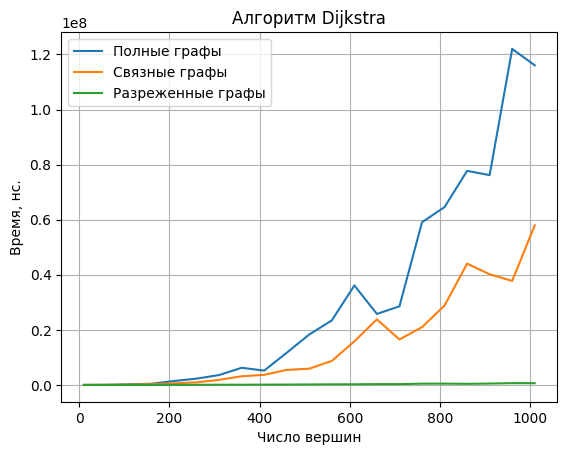

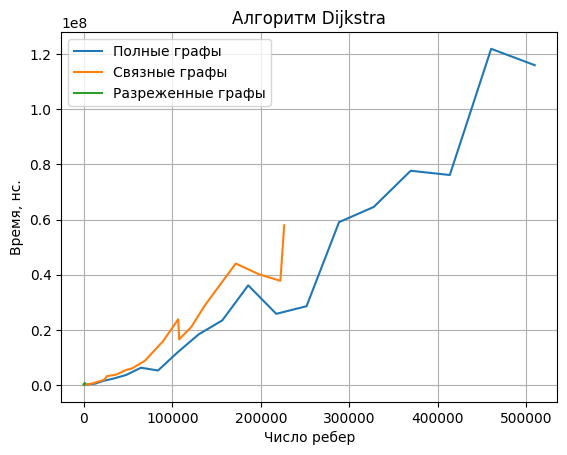

Full
Partial
Tree


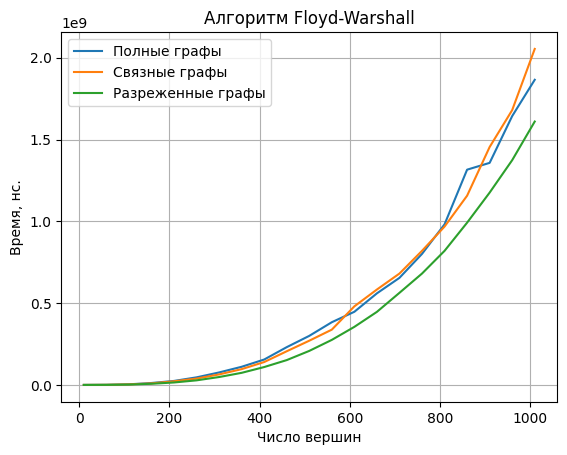

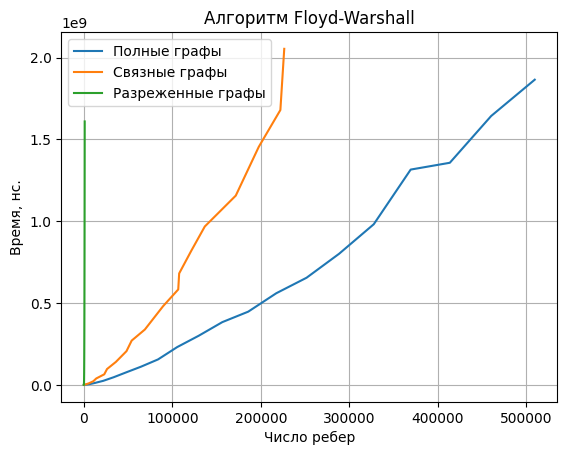

Full
Partial
Tree


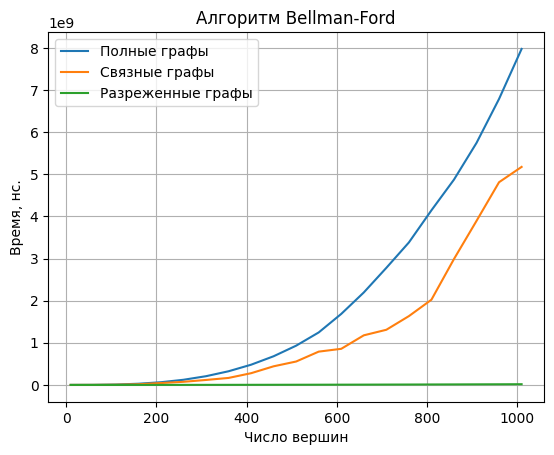

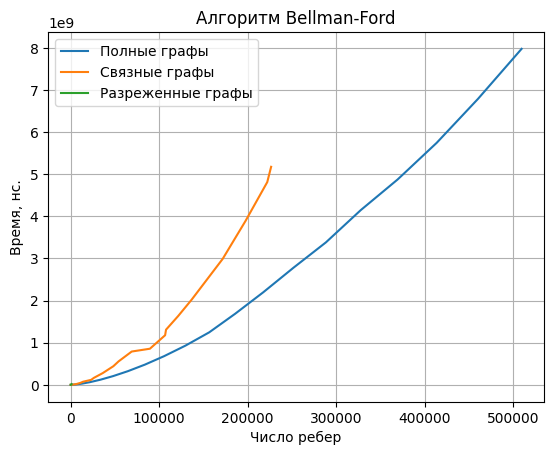

Full
Partial
Tree


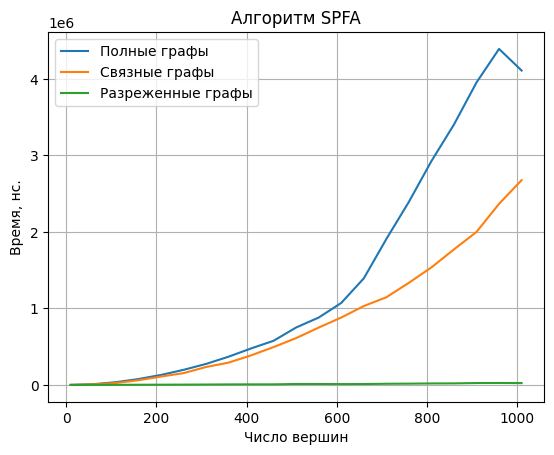

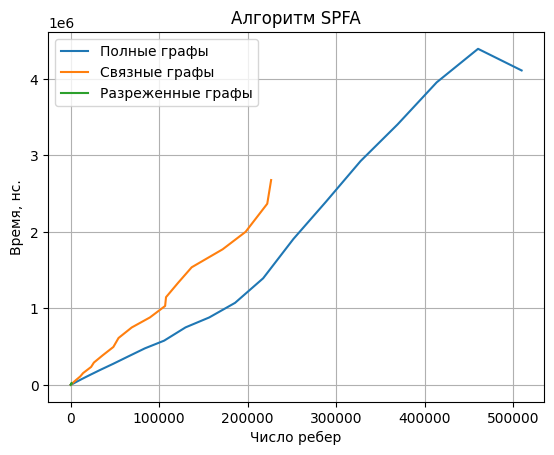

In [70]:
# Строим графики по каждому алгоритму
for pathfinder in df["pathfinder"].unique():
    plot_pathfinder_vertex_count(pathfinder)
    plot_pathfinder_edge_count(pathfinder)

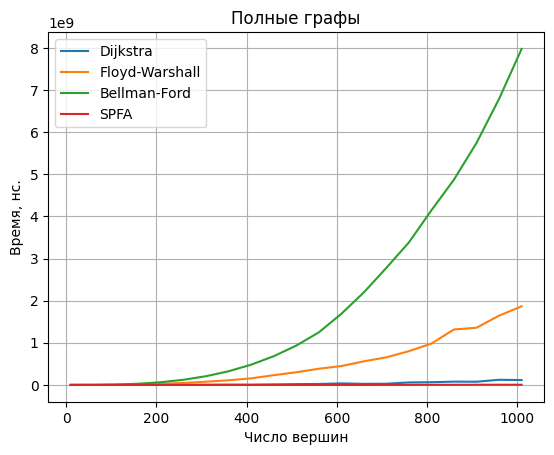

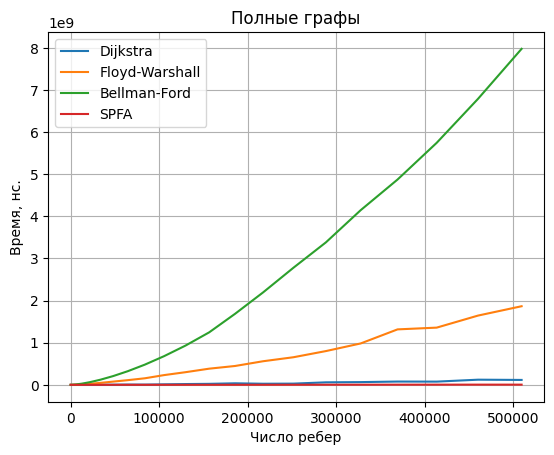

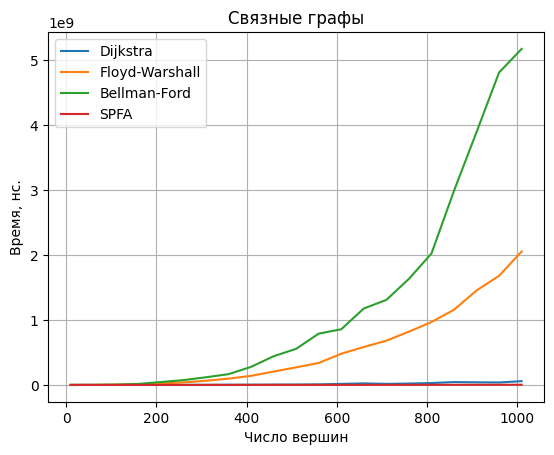

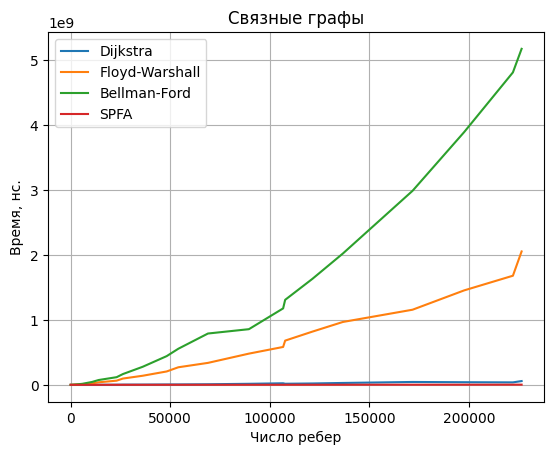

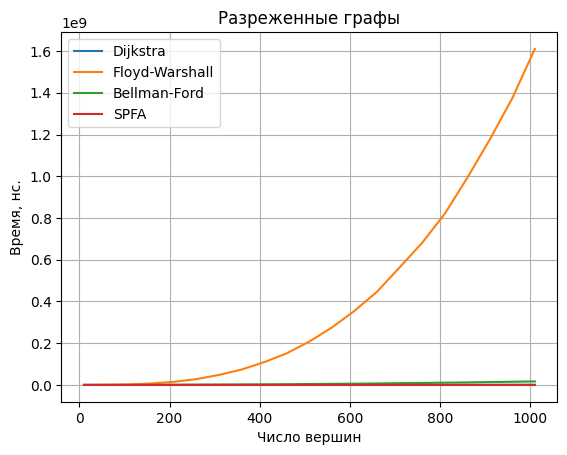

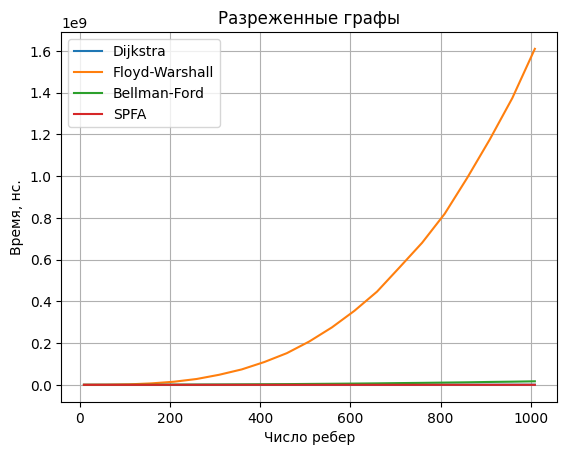

In [71]:
# Строим графики по всем алгоритмам
for graph_type in df["graph_type"].unique():
    plot_graph_type_vertex_count(graph_type)
    plot_graph_type_edge_count(graph_type)